Pre Entrega n°1 - Briozzo Rodrigo Nicolas
Analisis de tendencia de ventas y resultados de una compañia

ABSTRACT
Resumen:

Este proyecto tiene como objetivo visualizar el comportamiento de las ventas a lo largo de los periodos 2022 y 2023 teniendo una apertura mensual y por cada tipo de producto. Dentro del Dataset se cuenta, entre otras, con infomacion relevante para el analisis como son:

- Año
- Mes
- Productos
- Cantidades vendidas
- Ingresos netos
- Costos

Hipotesis de interes:

Habiendo realizado un analisis previo del dataset en cuestion, planteo las siguientes hipotesis:

- Las cantidades vendidas entre un año y otro han disminuido. Es decir, al comparar los periodos 2022 vs 2023 se nota una caida en el volumen de ventas.
- Pese a que existe una caida en el volumen de ventas cuando se comparan ambos periodos, se observa que los ingresos netos de la compañia han incrementado mucho mas que el periodo anterior.
- Las ganancias de la compañia han sido superiores en el periodo 2023, pese a haber vendido menos.

Objetivos:
- Demostrar que las hipotesis son verdaderas mendiante un analisis estadistico y visual
- Exponer los datos relevantes del analisis como son ingresos netos y cantidades vendidas
- Determinar la causa de tal efecto para la compañia. ¿La compañia puede sostener esta tendencia de baja de voluemenes de venta compensado con incremento de precios?


In [67]:
# Importo librerías
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression , Ridge , Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor

In [3]:
# Leo el dataset
df = pd.read_excel('Dataset_PF.xlsx')
df


,Calendar year,Calendar month,Sales Organization,Country Key,Sales District Ship-to,County Ship-to,ArticleMainGroup (c),Prod.hierarchy,Target Quantity,Net Revenue,Freight (sum),Costs trading goods,Prop. prod. costs,Special costs Sales,Fixed prod. costs,CM II without capital
0,2022,1,AR Ventas Locales,Argentina,AR Centro,Buenos Aires,Board,"REG S 9,5 MM",77.76000,16852.40004,2057.12102,0.0,5608.21526,0,490.84734,8696.21642
1,2022,1,AR Ventas Locales,Argentina,AR Centro,Capital Federal,Board,"REG S 9,5 MM",22.17600,4641.06516,583.62122,0.0,1599.39127,0,139.95772,2318.09495
2,2022,1,AR Ventas Locales,Argentina,AR Centro,Córdoba,Board,"REG S 9,5 MM",38.01600,8069.81890,835.68451,0.0,2741.57633,0,240.44632,4252.11174
3,2022,1,AR Ventas Locales,Argentina,AR Centro,La Pampa,Board,"REG S 9,5 MM",6.91200,1394.94505,164.04627,0.0,498.51154,0,43.62318,688.76406
4,2022,1,AR Ventas Locales,Argentina,AR Centro,Mendoza,Board,"REG S 9,5 MM",12.96000,2863.38784,67.31733,0.0,934.70914,0,81.79346,1779.56791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,2023,12,AR Ventas Locales,Argentina,AR Sur,Neuquen,Board,REG 8.5 MM NEBULA,5.52576,16836.48506,894.33473,0.0,4449.48119,0,1112.25528,10380.41386
3462,2023,12,AR Ventas Locales,Argentina,AR Sur,Rio Negro,Board,REG 8.5 MM NEBULA,0.00000,0.00000,-0.00079,0.0,0.00000,0,0.00000,0.00079
3463,2023,12,AR Ventas Locales,Argentina,AR Sur,Chubut,Board,REG 9.5 MM PEGASUS,0.23520,660.50311,88.79635,0.0,141.61331,0,29.03199,401.06146
3464,2023,12,AR Ventas Locales,Argentina,AR Sur,Chubut,Board,DIAMANT 12.5 MM,1.00800,3269.47691,779.26595,0.0,761.62624,0,97.99195,1630.59277


In [4]:
# Uso e método round para redondear las cifras decimales
df.describe().round()


,Calendar year,Calendar month,Target Quantity,Net Revenue,Freight (sum),Costs trading goods,Prop. prod. costs,Special costs Sales,Fixed prod. costs,CM II without capital
count,3466.0,3466.0,3466.0,3466.0,3466.0,3466.0,3466.0,3466.0,3466.0,3466.0
mean,2022.0,6.0,7.0,4741.0,543.0,58.0,1459.0,0.0,184.0,2498.0
std,0.0,3.0,23.0,14659.0,2012.0,388.0,4479.0,0.0,689.0,7709.0
min,2022.0,1.0,-0.0,-130.0,-16618.0,0.0,-61.0,0.0,-5.0,-4608.0
25%,2022.0,3.0,0.0,297.0,18.0,0.0,64.0,0.0,6.0,148.0
50%,2022.0,6.0,1.0,1028.0,85.0,0.0,293.0,0.0,29.0,525.0
75%,2023.0,9.0,5.0,3515.0,355.0,0.0,1072.0,0.0,113.0,1845.0
max,2023.0,12.0,278.0,309394.0,42337.0,11332.0,82846.0,0.0,21045.0,176308.0


In [5]:
#Visualizo la informacion relativa del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Calendar year           3466 non-null   int64  
 1   Calendar month          3466 non-null   int64  
 2   Sales Organization      3466 non-null   object 
 3   Country Key             3466 non-null   object 
 4   Sales District Ship-to  3466 non-null   object 
 5   County Ship-to          3466 non-null   object 
 6   ArticleMainGroup (c)    3466 non-null   object 
 7   Prod.hierarchy          3466 non-null   object 
 8   Target Quantity         3466 non-null   float64
 9   Net Revenue             3466 non-null   float64
 10  Freight (sum)           3466 non-null   float64
 11  Costs trading goods     3466 non-null   float64
 12  Prop. prod. costs       3466 non-null   float64
 13  Special costs Sales     3466 non-null   int64  
 14  Fixed prod. costs       3466 non-null   

In [6]:
#Verifico si existen datos nulos en el Dataset
df.isna().sum()

Calendar year             0
Calendar month            0
Sales Organization        0
Country Key               0
Sales District Ship-to    0
County Ship-to            0
ArticleMainGroup (c)      0
Prod.hierarchy            0
Target Quantity           0
Net Revenue               0
Freight (sum)             0
Costs trading goods       0
Prop. prod. costs         0
Special costs Sales       0
Fixed prod. costs         0
CM II without capital     0
dtype: int64

Para contextualizar el siguiente codigo: La informacion de ventas viene dado de una base mucho mas grande que la que se utiliza para este proyecto, en donde se podia observar una apertura de ventas por Pais, Provincias, Destinos, codigos de productos. Sin embargo, y a los fines introductorios, decidi minimizar la cantidad de informacion por las siguientes razones:
- La cantidad de filas ascendia al doble de las actuales
- La fuente primaria de ventas, el 90% de las ventas, se producen a nivel local y por lo tanto decidi quitar el efecto exportacion del analisis
- Asociado al punto anterior, como las ventas se determinan en pesos Argentinos (ARS), distorsionaria al analisis colocar ventas de productos de exportacion ya que estas se desarrollan en USD.
- Debido a la amplitud del dataset, y teniendo en cuenta la cantidad de productos, decidi quitar el detalle producto debido a que por un lado el 80% de la venta corresponde a un solo producto (Producto estrella ST 12,5), pero tambien, al tener muchos diferentes productos he decidio quitar la columna Product hierarchy y mantener la columna de Article Main Group (c) que engloba una categoria de productos que representan el 90% de la facturacion de la empresa. La empresa analiza su evolucion por grupo de productos ya que la unidad de medida puede variar (m2, Ml, to, etc).

Debido a todos estos puntos, se procede a quitar del analisis las columnas de Sales Organization, Country Key, Sales District Ship-to, County Ship-to, Prod.hierarchy.

In [7]:
#Elimino columnas que no agregan valor al analisis
columnas_a_eliminar = ['Sales Organization', 'Country Key', 'Sales District Ship-to', 'County Ship-to', 'Prod.hierarchy']
df = df.drop(columns=columnas_a_eliminar)

# Verifico las primeras filas del dataset después de la limpieza
print(df.head())

   Calendar year  Calendar month ArticleMainGroup (c)  Target Quantity  \
0           2022               1                Board           77.760   
1           2022               1                Board           22.176   
2           2022               1                Board           38.016   
3           2022               1                Board            6.912   
4           2022               1                Board           12.960   

   Net Revenue  Freight (sum)  Costs trading goods  Prop. prod. costs  \
0  16852.40004     2057.12102                  0.0         5608.21526   
1   4641.06516      583.62122                  0.0         1599.39127   
2   8069.81890      835.68451                  0.0         2741.57633   
3   1394.94505      164.04627                  0.0          498.51154   
4   2863.38784       67.31733                  0.0          934.70914   

   Special costs Sales  Fixed prod. costs  CM II without capital  
0                    0          490.84734        

In [8]:
#Visualizo la informacion relativa del Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Calendar year          3466 non-null   int64  
 1   Calendar month         3466 non-null   int64  
 2   ArticleMainGroup (c)   3466 non-null   object 
 3   Target Quantity        3466 non-null   float64
 4   Net Revenue            3466 non-null   float64
 5   Freight (sum)          3466 non-null   float64
 6   Costs trading goods    3466 non-null   float64
 7   Prop. prod. costs      3466 non-null   float64
 8   Special costs Sales    3466 non-null   int64  
 9   Fixed prod. costs      3466 non-null   float64
 10  CM II without capital  3466 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 298.0+ KB


In [9]:
#Agrupo las cantidades de ventas por cada año del analisis para poder luego graficar
Ventas_por_año = df.groupby("Calendar year")["Target Quantity"].sum().reset_index()




C:\Users\briozzior\AppData\Local\Temp\ipykernel_16032\2285931360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Calendar year', y='Target Quantity', data=Ventas_por_año, palette='viridis')


Text(0.5, 1.0, 'Cantidades Totales Vendidas por Año')

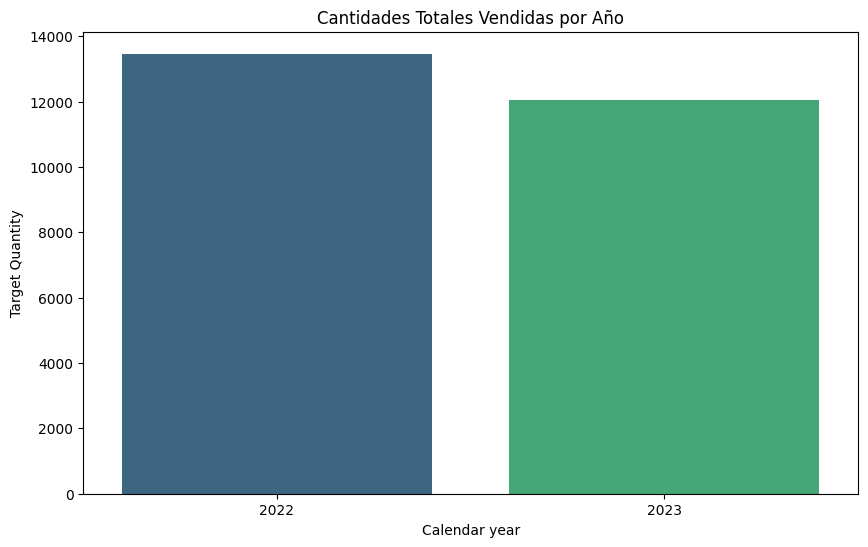

In [10]:
#Grafico las cantidades de ventas por año
plt.figure(figsize=(10, 6))
sns.barplot(x='Calendar year', y='Target Quantity', data=Ventas_por_año, palette='viridis')
# Configuro el título y las etiquetas
plt.title('Cantidades Totales Vendidas por Año')

Observaciones

Luego de visualizar el grafico anterior, podemos notar que estamos en condiciones de afirmar que la hipotesis siguiente es verdadera:
- Las cantidades vendidas entre un año y otro han disminuido. Es decir, al comparar los periodos 2022 vs 2023 se nota una caida en el volumen de ventas.

El grafico nos esta mostrando que los volumenes de venta han disminuido entre un periodo y el otro, pasando de 13,4 a 12 (2022 vs 2023 respectivamente).


In [11]:
#Agrupo las cantidades de venta por año y por mes
ventas_por_año_mes = df.groupby(["Calendar year", "Calendar month"])["Target Quantity"].sum().reset_index()

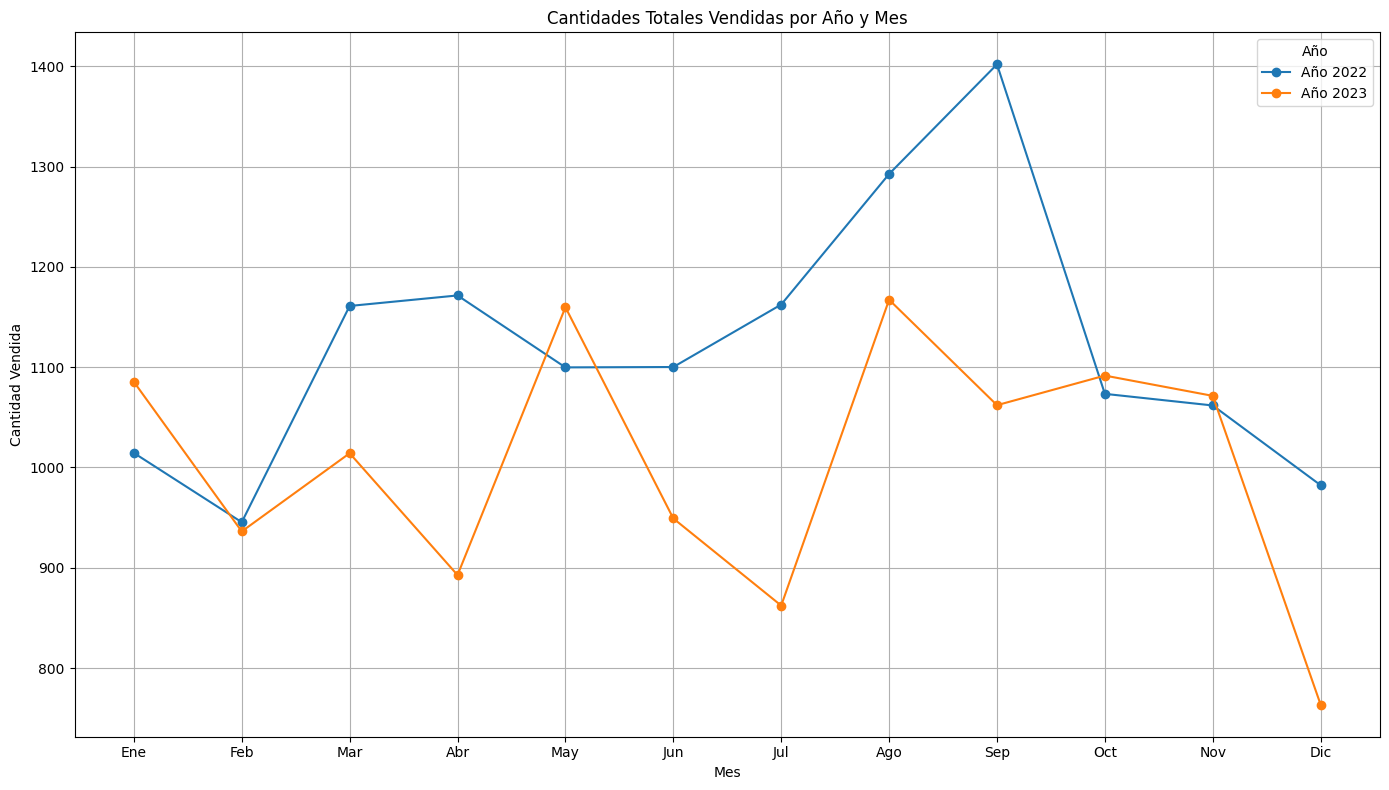

In [12]:
# Creo un gráfico de líneas
plt.figure(figsize=(14, 8))

# Creo una gráfica para cada año
for año in ventas_por_año_mes['Calendar year'].unique():
    subset = ventas_por_año_mes[ventas_por_año_mes['Calendar year'] == año]
    plt.plot(subset['Calendar month'], subset['Target Quantity'], marker='o', label=f'Año {año}')

# Configuro el título y las etiquetas
plt.title('Cantidades Totales Vendidas por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año')
plt.grid(True)
plt.tight_layout()
plt.show()


Observaciones

En este grafico podemos observar una apertura mensualizada de los volumenes vendidos, en donde se puede notar como la linea que refiere al periodo 2023 siempre estuvo por debajo de la linea que representa al periodo 2022. Y se puede observar una brutal caida en el mes de diciembre 2023.

In [13]:

# Creo un gráfico de calor usando pivot_table
# Pivotar los datos para crear una tabla de contingencia
ventas_pivot = ventas_por_año_mes.pivot_table(
    index='Calendar month', 
    columns='Calendar year', 
    values='Target Quantity', 
    aggfunc='sum'
)

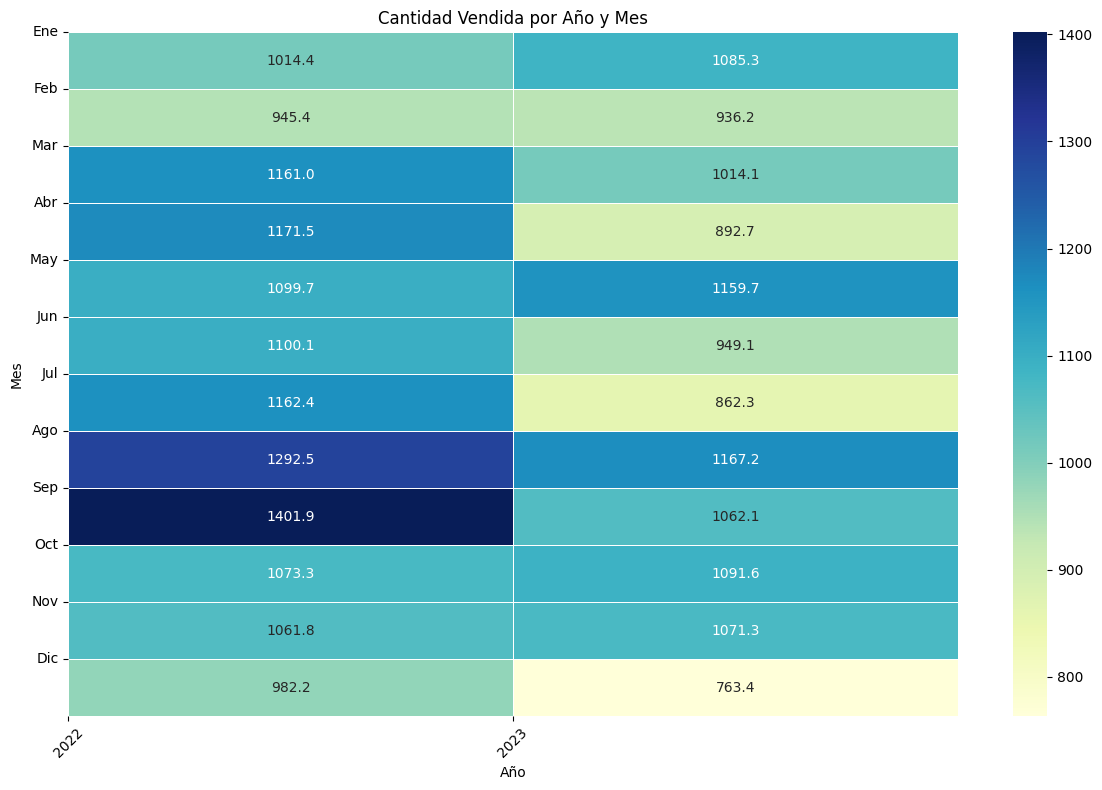

In [14]:
# Creo un gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(ventas_pivot, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)
# Configurar el título y las etiquetas
plt.title('Cantidad Vendida por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.xticks(ticks=range(len(ventas_pivot.columns)), labels=ventas_pivot.columns, rotation=45)
plt.yticks(ticks=range(len(ventas_pivot.index)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.tight_layout()
plt.show()

Observaciones

A los fines de poder vislumbrar mejor los volumenes vendidos por mes y año, se crea este mapa de calor por mes en donde se puede observar que en ningun mes del 2023 se logro llegar a vender la maxima cantidad vendida en un mes de 2022. El el mes de Septiembre 2022 se lograron vender 1.401,9 unidades como maximo mes de venta. En el periodo 2023 el mes que mas ha vendido fue Agosto con un total de 1.167,2.

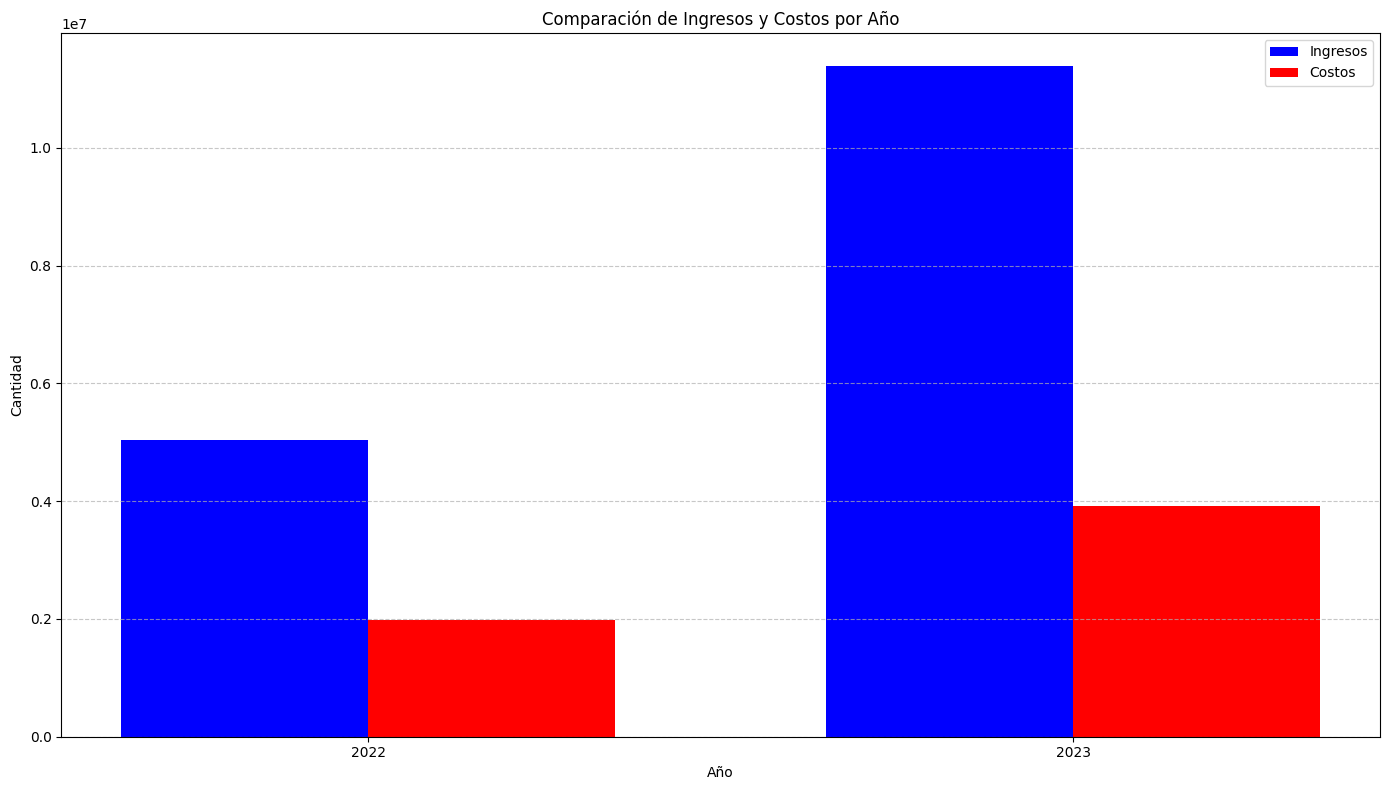

In [15]:
# Calculo los costos totales
df['Total Costs'] = df[['Costs trading goods', 'Prop. prod. costs', 'Special costs Sales', 'Fixed prod. costs']].sum(axis=1)

# Agrupo por año y sumar ingresos y costos
datos_agrupados = df.groupby('Calendar year').agg(
    Total_Revenue=('Net Revenue', 'sum'),
    Total_Costs=('Total Costs', 'sum')
).reset_index()

# Creo un gráfico de barras agrupadas
plt.figure(figsize=(14, 8))

# Defino la posición de las barras
bar_width = 0.35
index = range(len(datos_agrupados['Calendar year']))

# Creo las barras para ingresos
plt.bar(index, datos_agrupados['Total_Revenue'], bar_width, label='Ingresos', color='blue')

# Creo las barras para costos, desplazadas por el ancho de la barra
plt.bar([i + bar_width for i in index], datos_agrupados['Total_Costs'], bar_width, label='Costos', color='red')

# Configuro el título y las etiquetas
plt.title('Comparación de Ingresos y Costos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks([i + bar_width / 2 for i in index], datos_agrupados['Calendar year'])
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observaciones

Estre grafico de barras apiladas intenta responder a la siguiente hipotesis:
- Las ganancias de la compañia han sido superiores en el periodo 2023, pese a haber vendido menos.

Se observa que si bien en ambos casos, tanto ingresos como costos, han incrementado de un periodo a otro, se puede ver claramente como la barra de los ingresos se despega mucho mas que la barra de los costos, ocasionando asi un ingreso neto mayor para la compañia.

In [16]:
# Agrupo por año y mes, y sumo los ingresos
ingresos_agrupados = df.groupby(['Calendar year', 'Calendar month'])['Net Revenue'].sum().reset_index()

ingresos_agrupados['Calendar month'] = ingresos_agrupados['Calendar month'].astype(int)

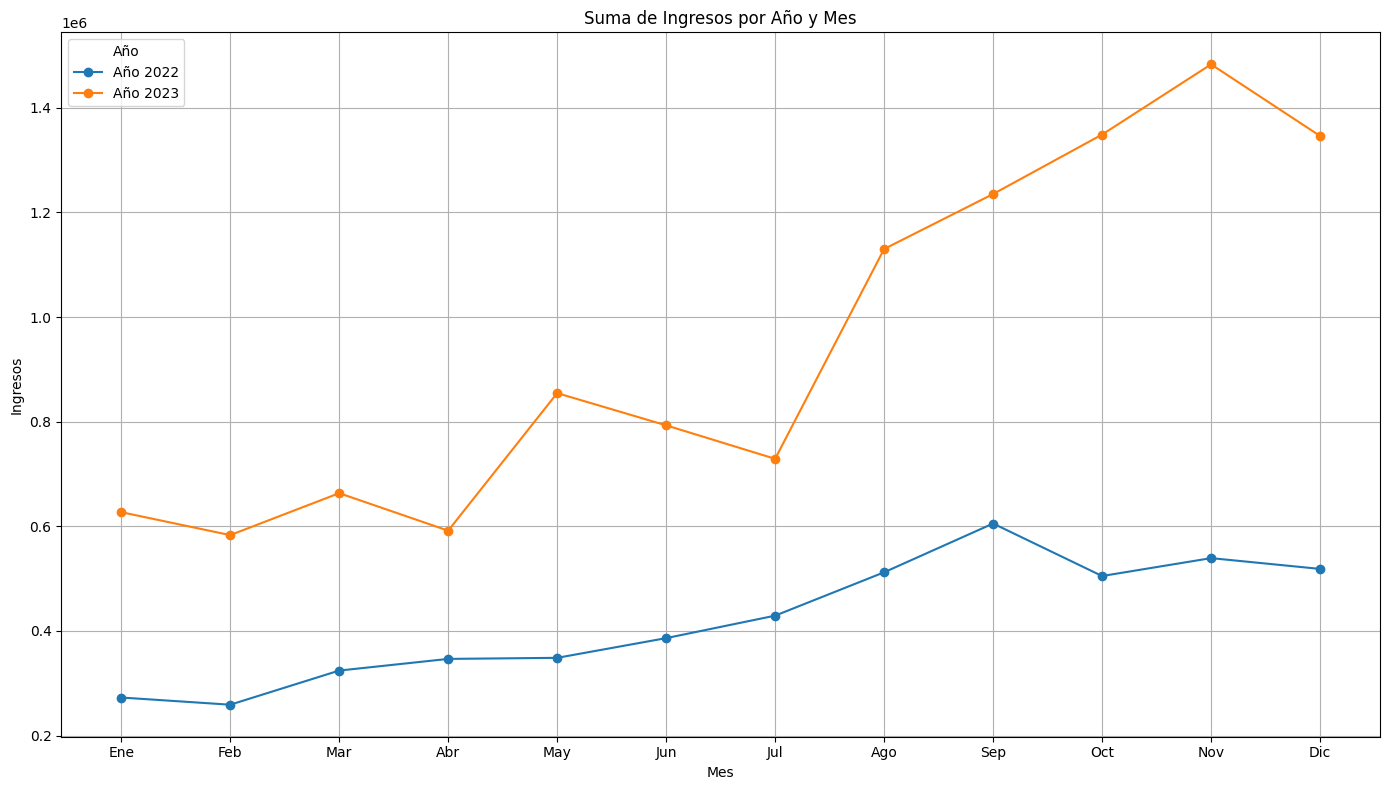

In [17]:
# Creo un gráfico de líneas
plt.figure(figsize=(14, 8))

# Creo una línea para cada año
for año in ingresos_agrupados['Calendar year'].unique():
    subset = ingresos_agrupados[ingresos_agrupados['Calendar year'] == año]
    plt.plot(subset['Calendar month'], subset['Net Revenue'], marker='o', label=f'Año {año}')

# Configuro el título y las etiquetas
plt.title('Suma de Ingresos por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año')
plt.grid(True)
plt.tight_layout()
plt.show()

Observaciones

Este grafico intenta responder a la hipotesis siguiente:

- Pese a que existe una caida en el volumen de ventas cuando se comparan ambos periodos, se observa que los ingresos netos de la compañia han incrementado mucho mas que el periodo anterior.

Se puede observar como la linea de ingresos del periodo 2023 toma un crecimiento exponencial por sobre la linea de ingresos 2022, y mas aun cuando se aproxima al mes de Agosto. Claramente hubo un suceso que hizo que los ingresos crezcan de manera gigante durante el periodo Agosto hasta diciembre, este ultimo mes donde se observa que esa tendencia empieza a ser distinta.



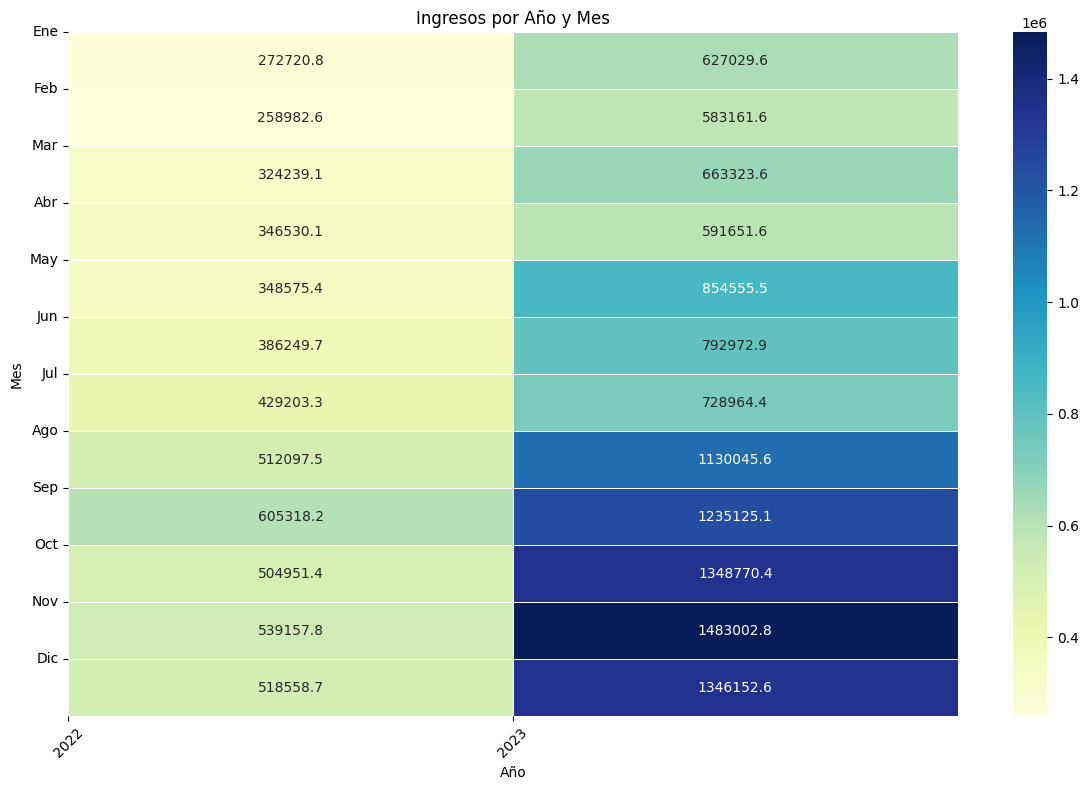

In [18]:
# Creo un gráfico de calor usando pivot_table
ingresos_pivot = ingresos_agrupados.pivot_table(
    index='Calendar month', 
    columns='Calendar year', 
    values='Net Revenue', 
    aggfunc='sum'
)

# Creo el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(ingresos_pivot, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)

# Configurar el título y las etiquetas
plt.title('Ingresos por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.xticks(ticks=range(len(ingresos_pivot.columns)), labels=ingresos_pivot.columns, rotation=45)
plt.yticks(ticks=range(len(ingresos_pivot.index)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.tight_layout()
plt.show()

Observaciones

Aqui se intenta mostrar a traves de los numeros y un mapa de calor, los ingresos netos aperturados por mes entre ambos periodos.

Profundizacion del analisis

Si bien esto es el comienzo del analisis, se pudo determinar las hipotesis y las posibles respuestas a estas para demostrar las causas que acarran este planteamiento. 
Es importante remarcar que no es suficiente el analisis para llegar a una unica conclusion, sino que se debe abordar mucho mas y poner enfasis en otros puntos que seran claves para llegar a un buen puerto y con ello poder tener la informacion precisa para la toma de decisiones. 
Querara profundizar otras variables como son mayor apertura de informacion de volumenes de venta, como por ejemplo provincia, producto que mas variacion negativa tuvo en volumen vs sus propios ingresos y gastos, rentabilidad del negocio, etc.

En lineas generales, se ha demostrado la veracidad de las distintas hipotesis planteadas en un principio, mostrando grafica y numericamente. A modo de resumen de lo que se expuso, podemos llegar a la siguiente conclusion:

" En comparacion con 2022, en el año 2023 los volumenes de venta han disminuido, los costos totales han incrementado hasta el doble que el año anterior, los ingresos netos incrementaron mucho mas que el doble que el año anterior y, consecuentemente, los resultados han sido mayores en el 2023. El problema que esta teniendo la empresa (definido como problema debido a que es una practica que dificilmente pueda mantenerse para solventar la perdida de volumen vendido) es que esta incrementando los precios muy por encima del incremento de sus costos, y de esta forma, encubriendo esa caida en volumen que claramente se observa".

El trabajo de modelado tendra por objetivo determinar los precios de venta de los productos mediante los datos de costos, cantidades y los resultados esperados. De esta forma, se podra observa cuales son los precios de venta que la empresa esta vendiendo sus productos para que pueda tomar decisiones al respecto.

In [20]:
df['Calendar year'].value_counts()



Calendar year
2022    1847
2023    1619
Name: count, dtype: int64

In [50]:
#Visualizo la columna categorica que tiene el dataset

df['ArticleMainGroup (c)'].value_counts()

ArticleMainGroup (c)
0    3466
Name: count, dtype: int64

In [51]:
# label encoder para la categoricas
column=['ArticleMainGroup (c)']

df[column] = df[column].apply(LabelEncoder().fit_transform)

In [22]:
df.head()

,Calendar year,Calendar month,ArticleMainGroup (c),Target Quantity,Net Revenue,Freight (sum),Costs trading goods,Prop. prod. costs,Special costs Sales,Fixed prod. costs,CM II without capital,Total Costs
0,2022,1,0,77.760,16852.40004,2057.12102,0.0,5608.21526,0,490.84734,8696.21642,6099.06260
1,2022,1,0,22.176,4641.06516,583.62122,0.0,1599.39127,0,139.95772,2318.09495,1739.34899
2,2022,1,0,38.016,8069.81890,835.68451,0.0,2741.57633,0,240.44632,4252.11174,2982.02265
3,2022,1,0,6.912,1394.94505,164.04627,0.0,498.51154,0,43.62318,688.76406,542.13472
4,2022,1,0,12.960,2863.38784,67.31733,0.0,934.70914,0,81.79346,1779.56791,1016.50260


In [23]:
df_final = df.copy()

In [24]:
#Creo una columna con mi objetivo que sera el precio de venta de cada articulo de producto. La misma se determina dividiendo el ingreso total de cada linea sobre las cantidades totales de cada linea

df_final["Net Revenue per unit"] = df_final["Net Revenue"]/ df_final["Target Quantity"]

In [25]:
print(df_final)

      Calendar year  Calendar month  ArticleMainGroup (c)  Target Quantity  \
0              2022               1                     0         77.76000   
1              2022               1                     0         22.17600   
2              2022               1                     0         38.01600   
3              2022               1                     0          6.91200   
4              2022               1                     0         12.96000   
...             ...             ...                   ...              ...   
3461           2023              12                     0          5.52576   
3462           2023              12                     0          0.00000   
3463           2023              12                     0          0.23520   
3464           2023              12                     0          1.00800   
3465           2023              12                     0          0.40320   

      Net Revenue  Freight (sum)  Costs trading goods  Prop. pr

In [29]:
#Verifico si existen datos nulos
df_final.isna().sum()

Calendar year              0
Calendar month             0
ArticleMainGroup (c)       0
Target Quantity            0
Net Revenue                0
Freight (sum)              0
Costs trading goods        0
Prop. prod. costs          0
Special costs Sales        0
Fixed prod. costs          0
CM II without capital      0
Total Costs                0
Net Revenue per unit     275
dtype: int64

In [30]:
#Elimino valores NaN
df_final = df_final.dropna()

In [31]:
#Verifico si se eliminaron valores nulos
print(df_final.isnull().sum())

Calendar year            0
Calendar month           0
ArticleMainGroup (c)     0
Target Quantity          0
Net Revenue              0
Freight (sum)            0
Costs trading goods      0
Prop. prod. costs        0
Special costs Sales      0
Fixed prod. costs        0
CM II without capital    0
Total Costs              0
Net Revenue per unit     0
dtype: int64


In [32]:
print(df_final['Net Revenue per unit'].head())

0    216.723252
1    209.283241
2    212.274277
3    201.814967
4    220.940420
Name: Net Revenue per unit, dtype: float64


In [33]:
#Verifico si existen datos nulos
df_final.isna().sum()

Calendar year            0
Calendar month           0
ArticleMainGroup (c)     0
Target Quantity          0
Net Revenue              0
Freight (sum)            0
Costs trading goods      0
Prop. prod. costs        0
Special costs Sales      0
Fixed prod. costs        0
CM II without capital    0
Total Costs              0
Net Revenue per unit     0
dtype: int64

In [35]:
# Verificar si hay valores infinitos en alguna columna. Esto se produce debido a que la columna que estoy creando se da por la division entre dos numeros
# Si en una de las columnas no existe valor, es probable que de error o Inf. Por ello, se realiza una limpieza de estos datos.
print(df_final[np.isinf(df_final).any(axis=1)])

      Calendar year  Calendar month  ArticleMainGroup (c)  Target Quantity  \
457            2022               3                     0              0.0   
1612           2022              11                     0              0.0   
1826           2022              12                     0              0.0   
1911           2023               1                     0              0.0   
2038           2023               2                     0              0.0   
2181           2023               3                     0              0.0   
2211           2023               3                     0              0.0   
2256           2023               3                     0              0.0   
2275           2023               4                     0              0.0   
2563           2023               6                     0              0.0   
2729           2023               7                     0              0.0   
2836           2023               8                     0       

In [36]:
# Eliminar filas con valores infinitos
df_final = df_final[~np.isinf(df_final).any(axis=1)]

<Axes: ylabel='Net Revenue per unit'>

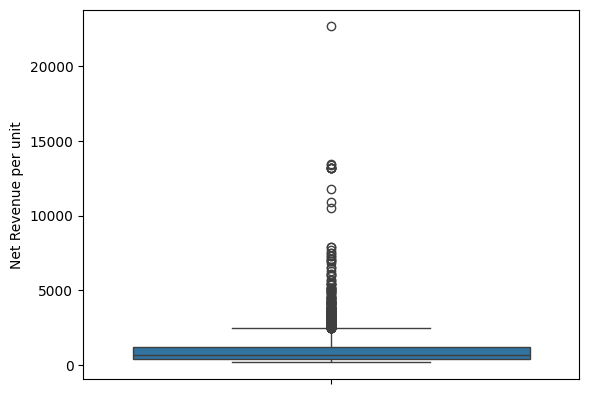

In [38]:
sns.boxplot(data=df_final['Net Revenue per unit'])

In [44]:
# manejo de outliers
def outliers(data,feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = data.index[(data[feature]<lower_limit) | (data[feature]>upper_limit)]

    return ls

def remove(df_final,ls):
    ls = sorted(set(ls))
    df_final = df_final.drop(ls)
    return df_final

In [45]:
# obtención de outliers
index_list = []
index_list.extend(outliers(df_final,'Net Revenue per unit'))

index_list

[75,
 76,
 77,
 150,
 151,
 231,
 233,
 306,
 307,
 390,
 474,
 475,
 849,
 850,
 851,
 887,
 902,
 903,
 929,
 1004,
 1045,
 1046,
 1155,
 1156,
 1157,
 1226,
 1303,
 1460,
 1462,
 1463,
 1499,
 1501,
 1616,
 1617,
 1618,
 1619,
 1654,
 1695,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1806,
 1807,
 1808,
 1809,
 1810,
 1845,
 1846,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1923,
 1996,
 2059,
 2060,
 2061,
 2062,
 2092,
 2189,
 2190,
 2191,
 2192,
 2193,
 2194,
 2195,
 2196,
 2197,
 2198,
 2231,
 2315,
 2316,
 2317,
 2318,
 2319,
 2320,
 2345,
 2346,
 2347,
 2453,
 2454,
 2455,
 2456,
 2457,
 2458,
 2489,
 2490,
 2492,
 2493,
 2544,
 2610,
 2611,
 2612,
 2613,
 2614,
 2615,
 2616,
 2617,
 2618,
 2645,
 2732,
 2734,
 2735,
 2736,
 2737,
 2739,
 2741,
 2743,
 2744,
 2798,
 2799,
 2861,
 2863,
 2864,
 2865,
 2866,
 2868,
 2896,
 2897,
 2898,
 2899,
 2900,
 2914,
 2940,
 2941,
 2943,
 3001,
 3004,
 3005,
 3006,
 3007,
 3008,
 3009,
 3010,
 3012,
 3038,
 3039,
 3040,
 3054,


In [46]:
# borramos outliers
df_final = remove(df_final,index_list)

In [47]:
df_final.shape

(2950, 13)

MODELADO

In [52]:
# Cargar los datos
X = df_final.drop(['Net Revenue per unit'],axis=1)
y = df_final['Net Revenue per unit']

In [53]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

print('x_train size',X_train.shape)
print('y_train size',y_train.shape)
print('x_test size',X_test.shape)
print('y_test size',y_test.shape)

x_train size (2065, 12)
y_train size (2065,)
x_test size (885, 12)
y_test size (885,)


REGRESION LINEAL

In [54]:
# instanciamos el modelo
model=LinearRegression()

In [55]:
# entranamos
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# prediccion
y_pred = model.predict(X_test)

In [57]:
# metrica R2
r2_rl = r2_score(y_test, y_pred)
r2_rl

0.5545313252912546

KNN

In [62]:
# instanciamos el modelo
model = KNN(n_neighbors=5,weights="uniform",metric="manhattan")

In [63]:
# entranamos
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan')

In [64]:
# prediccion
y_pred = model.predict(X_test)

In [72]:
# metrica R2
r2_knn = r2_score(y_test, y_pred)
r2_knn

0.36306720260399794

XGBOOST

In [73]:
# instanciamos el modelo
model = XGBRegressor(n_estimators= 2000 , max_depth= 7 , learning_rate = 0.01)

In [75]:
# entranamos
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
# prediccion
y_pred = model.predict(X_test)

In [77]:
# metrica R2
r2_xgb = r2_score(y_test, y_pred)
r2_xgb

0.9484277333596313

RESULTADOS EN EL TEST

In [78]:
print("Algoritmo Regresión Lineal " + str(round(r2_rl, 4)))
print("Algoritmo KNN " + str(round(r2_knn, 4)))
print("Algoritmo XGB " + str(round(r2_xgb, 4)))

Algoritmo Regresión Lineal 0.5545
Algoritmo KNN 0.3631
Algoritmo XGB 0.9484


El mejor fue XGB

In [80]:
y_pred[0]

np.float32(470.59842)

In [81]:
y_test

1706     454.152926
870      463.229504
195      353.268506
2147     719.705291
1828     422.224859
           ...     
2593    1418.488620
1255     601.408532
2873     798.245875
2922     994.633373
1696     424.928030
Name: Net Revenue per unit, Length: 885, dtype: float64

CONCLUSIONES FINALES

Habiendo realizado los distintos analisis y utilizando varias de las herramientas que hemos visto durante el curso sobre modelado de datos y predicciones de Algoritmos supervisados, particularmente regresion, he llegado a la conclusion que deberia tomar como mi mejor modelo predictivo al algotimo de XGBOOST que arrojo un 94,8% de acierto vs Regresion lineal (55,4%) y KNN (36,3%). El algoritmo elegido es mejor ya que precide con mayor exactitud el problema de analisis y por el cual se dispuso realizar este proyecto.